<a href="https://colab.research.google.com/github/aem226/Reinforcement-Learning-Projects/blob/main/lab1_cse337.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [3]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

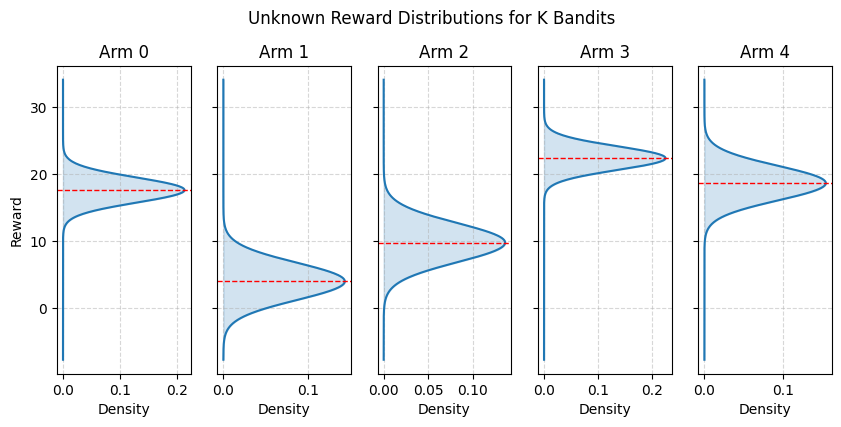

In [5]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

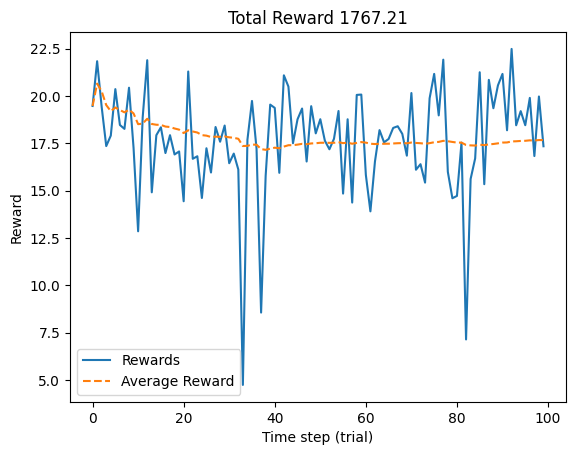

In [6]:
# Rewards
rewards = []

np.random.seed(seed)
k = len(bandit_mean)
epsilon = 0.10
Q = np.zeros(k)
N = np.zeros(k, dtype=int)

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = (np.random.randint(k) if (np.random.rand() < epsilon or not N.any())
       else np.random.choice(np.where(Q == Q.max())[0]))

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  N[a] += 1
  Q[a] += (r - Q[a]) / N[a]

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

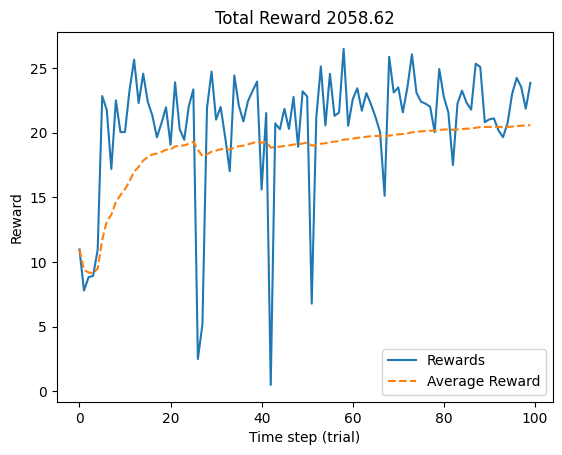

In [12]:
# Exercise 1
# Rewards
rewards = []

k = len(bandit_mean)     # number of arms
Q = np.zeros(k)
N = np.zeros(k)
epsilon = 0.1


for t in range(T):

    if np.random.rand() < epsilon:
        a = np.random.randint(k)
    else:
        best = np.where(Q == np.max(Q))[0]
        a = np.random.choice(best)

     # Reward from chosen arm
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

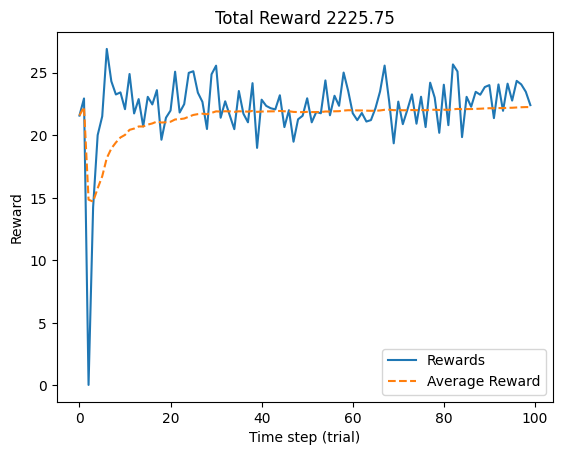

In [21]:
# Exercise 2: Greedy Strategy
# Always choose the arm with the highest estimated average reward.

rewards = []

np.random.seed(seed)
k = len(bandit_mean)
Q = np.zeros(k)               # estimated values
N = np.zeros(k, dtype=int)    # pull counts

# For T trials
for t in range(T):

    untried = np.where(N == 0)[0]
    if len(untried) > 0:
        a = np.random.choice(untried)  # try each arm once
    else:
        a = np.random.choice(np.where(Q == Q.max())[0])  # greedy choice

    # Reward from chosen arm
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimates
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward and average reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Greedy Strategy")
plt.title("Total Reward %.2f" % total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

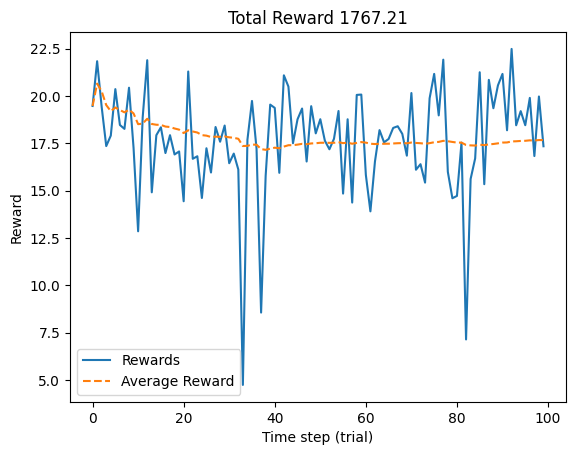

In [25]:
#Implement the Epsilon-greedy strategy
np.random.seed(seed)
k = len(bandit_mean)
Q = np.zeros(k)
N = np.zeros(k, dtype=int)
epsilon = 0.1

rewards = []

# For T trials
for t in range(T):

    if np.random.rand() < epsilon or not N.any():
        a = np.random.randint(k)   # Explore
    else:
        a = np.random.choice(np.where(Q == Q.max())[0])

    # Reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimates
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward and average reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Epsilon-Greedy Strategy")
plt.title("Total Reward %.2f" % total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?

When comparing ε = 0.1 and ε = 0.001, the key advantage of using a larger ε is better exploration. With ε = 0.1, the agent tries random arms more often, which prevents it from getting stuck on a poor early choice and helps it discover the true best arm, leading to higher long-run performance. By contrast, ε = 0.001 means almost no exploration, so the agent may exploit too soon and miss better options. The trade-off is that a larger ε wastes some pulls on exploration, but it usually produces more robust and reliable learning overall.

2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?

If the reward distribution changes smoothly over time, a purely greedy strategy is not very effective. Greedy always exploits the arm with the highest past average reward and never explores again, so if the environment shifts, it will keep pulling what used to be the best arm and miss new opportunities.

3. How does the choice of ε affect the balance between exploration and exploitation in the long run?

In the long run, the value of ε controls how much the agent balances exploration and exploitation. A small ε means the agent mostly exploits the best-known arm, which can yield high rewards if the environment is stable but risks getting stuck on a suboptimal choice. A larger ε encourages more exploration, making the agent more robust to noise or changes in rewards, but it sacrifices some efficiency since it keeps trying suboptimal arms.

4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

If the number of arms increases significantly, the ε-greedy strategy becomes less effective unless ε is adjusted. With many arms, random exploration spreads very thin,most exploratory pulls only test each arm once or twice, so the agent may take much longer to identify the best ones. A fixed small ε, like 0.1, might not explore enough of the larger action space, while a larger ε wastes too many trials on poor arms.

